<a href="https://colab.research.google.com/github/Psubrat98/ML-Projects-With-Python/blob/main/Netwok_attack_type_prediction(NIDS).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **`Network Intrusion Detection System(NIDS)`**

**INTRUDUCTION:**

Network-based intrusion detection systems (NIDS) are devices intelligently distributed within networks that passively inspect traffic traversing the devices on which they sit. NIDS can be hardware or software-based systems and, depending on the manufacturer of the system, can attach to various network mediums such as Ethernet, FDDI, and others. Oftentimes, NIDS have two network interfaces. One is used for listening to network conversations in promiscuous mode and the other is used for control and reporting.

With the advent of switching, which isolates unicast conversations to ingress and egress switch ports, network infrastructure vendors have devised port-mirroring techniques to replicate all network traffic to the NIDS. There are other means of supplying traffic to the IDS such as network taps. Cisco uses Switched Port Analyzer (SPAN) functionality to facilitate this capability on their network devices and, in some network equipment, includes NIDS components directly within the switch.

**DATA COLLECTION:**

The collected dataset is called **UNR-IDD Intrusion Detection Dataset** from Kaggle.

Tapadhir Das, Osama Abu Hamdan, Raj Mani Shukla, Shamik Sengupta, and Engin Arslan UNR-IDD: Intrusion Detection Dataset using Network Port Statistics, In 2023 IEEE Consumer Communications and Networking Conference (CCNC).

MORE COMPREHENSIVE INFORMATION CAN BE LOCATED AT THE DATASET WEBPAGE @ 
https://www.tapadhirdas.com/unr-idd-dataset

**Importing required libraries...**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(3)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

**Loadiing the Dataset from Lab files...**



In [2]:
data_set = pd.read_csv('/content/UNR-IDD.csv')

**Suffling the dataset...**

Here the dataset contains regular similar values so we have to suffle the dataset to ensures model is not overfitting to certain pattern duo sort order.

In [3]:
data_set = data_set.sample(frac=1).reset_index(drop=True)

In [4]:
print(data_set)

                 Switch ID Port Number  Received Packets  Received Bytes  \
0      of:0000000000000003     Port#:1            316743       101478563   
1      of:0000000000000004     Port#:2              2245        12718578   
2      of:0000000000000001     Port#:2               785        23253924   
3      of:000000000000000c     Port#:1               423           29020   
4      of:0000000000000001     Port#:1               157           11013   
...                    ...         ...               ...             ...   
37406  of:000000000000000c     Port#:4               611         6347429   
37407  of:000000000000000c     Port#:2               296         6311948   
37408  of:0000000000000004     Port#:2              5112        75954292   
37409  of:0000000000000005     Port#:2               249         6313621   
37410  of:000000000000000b     Port#:2            185410        26762661   

       Sent Bytes  Sent Packets  Port alive Duration (S)  Packets Rx Dropped  \
0      


**Merging required Label and Binary label columns of Dataset to get desire lable column...**

In [5]:
data_set['Actual Label'] = data_set['Label']+' '+data_set['Binary Label']

**Setiing required out put test values of Actual label column with numerical values...**

In [6]:
data_set.loc[data_set['Actual Label'] == 'TCP-SYN Attack', 'Actual Label',] = 0
data_set.loc[data_set['Actual Label'] == 'Blackhole Attack', 'Actual Label',] = 1
data_set.loc[data_set['Actual Label'] == 'Diversion Attack', 'Actual Label',] = 2
data_set.loc[data_set['Actual Label'] == 'Overflow Attack', 'Actual Label',] = 3
data_set.loc[data_set['Actual Label'] == 'Normal Normal', 'Actual Label',] = 4
data_set.loc[data_set['Actual Label'] == 'PortScan Attack', 'Actual Label',] = 5

In [7]:
data_set.head()

,Switch ID,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Packets Rx Dropped,Packets Tx Dropped,Packets Rx Errors,...,Latest bytes counter,is_valid,Table ID,Active Flow Entries,Packets Looked Up,Packets Matched,Max Size,Label,Binary Label,Actual Label
0,of:0000000000000003,Port#:1,316743,101478563,76474386,317930,2107,0,0,0,...,0,True,0,6,997649,997519,-1,Normal,Normal,4
1,of:0000000000000004,Port#:2,2245,12718578,142335,2344,126,0,0,0,...,513,True,0,8,4781,4688,-1,TCP-SYN,Attack,0
2,of:0000000000000001,Port#:2,785,23253924,6388548,1042,582,0,0,0,...,0,True,0,8,3123,3014,-1,Blackhole,Attack,1
3,of:000000000000000c,Port#:1,423,29020,19138042,1562,1451,0,0,0,...,0,True,0,4,4524,4411,-1,Overflow,Attack,3
4,of:0000000000000001,Port#:1,157,11013,6359525,629,562,0,0,0,...,0,True,0,4,2603,2494,-1,Blackhole,Attack,1


# Data Cleaning:

**Loading dataset in X & Y by droping features containing test values...**

In [8]:
X = data_set.drop(['Switch ID','Port Number','is_valid','Label','Binary Label', 'Actual Label'], axis =1)
Y = data_set['Actual Label']

**Removing the unwanted features from datset by using variance_thresold method...**

In [9]:
var_th = VarianceThreshold(threshold = 0)
var_th.fit(X)

VarianceThreshold(threshold=0)

In [10]:
var_th.get_support()

array([ True,  True,  True,  True,  True, False, False, False, False,
        True,  True,  True,  True,  True, False, False, False, False,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True, False])

In [11]:
X.columns[var_th.get_support()]

Index(['Received Packets', 'Received Bytes', 'Sent Bytes', 'Sent Packets',
       'Port alive Duration (S)', 'Delta Received Packets',
       'Delta Received Bytes', 'Delta Sent Bytes', 'Delta Sent Packets',
       'Delta Port alive Duration (S)', 'Connection Point', 'Total Load/Rate',
       'Total Load/Latest', 'Unknown Load/Rate', 'Unknown Load/Latest',
       'Latest bytes counter', 'Active Flow Entries', 'Packets Looked Up',
       'Packets Matched'],
      dtype='object')

In [12]:
const_columns = [column for column in X.columns
                 if column not in X.columns[var_th.get_support()]]
print(len(const_columns))

10


In [13]:
for features in const_columns:
  print(features)

Packets Rx Dropped
Packets Tx Dropped
Packets Rx Errors
Packets Tx Errors
Delta Packets Rx Dropped
 Delta Packets Tx Dropped
Delta Packets Rx Errors
Delta Packets Tx Errors
Table ID
Max Size


In [14]:
X.drop(const_columns, axis = 1)

,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Delta Received Packets,Delta Received Bytes,Delta Sent Bytes,Delta Sent Packets,Delta Port alive Duration (S),Connection Point,Total Load/Rate,Total Load/Latest,Unknown Load/Rate,Unknown Load/Latest,Latest bytes counter,Active Flow Entries,Packets Looked Up,Packets Matched
0,316743,101478563,76474386,317930,2107,0,0,556,4,5,1,0,0,0,0,0,6,997649,997519
1,2245,12718578,142335,2344,126,98,5632,5632,98,5,2,513,102673,513,102673,513,8,4781,4688
2,785,23253924,6388548,1042,582,118,4333378,5922,85,5,2,0,0,0,0,0,8,3123,3014
3,423,29020,19138042,1562,1451,0,0,560,4,5,1,0,0,0,0,0,4,4524,4411
4,157,11013,6359525,629,562,0,0,556,4,5,1,0,0,0,0,0,4,2603,2494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37406,611,6347429,18955456,974,266,2,278,280,2,5,4,0,0,0,0,0,10,278463,278355
37407,296,6311948,6323448,375,91,56,1970049,3279,41,4,2,0,0,0,0,0,10,3164,3073
37408,5112,75954292,94856832,5524,2457,4,556,556,4,5,3,0,0,0,0,0,5,21647,21408
37409,249,6313621,10273,76,66,5,759,759,5,4,2,0,0,0,0,0,4,757,667


**setting Y values as integer...**

In [15]:
Y = Y.astype('int')

In [16]:
print(X)


       Received Packets  Received Bytes  Sent Bytes  Sent Packets  \
0                316743       101478563    76474386        317930   
1                  2245        12718578      142335          2344   
2                   785        23253924     6388548          1042   
3                   423           29020    19138042          1562   
4                   157           11013     6359525           629   
...                 ...             ...         ...           ...   
37406               611         6347429    18955456           974   
37407               296         6311948     6323448           375   
37408              5112        75954292    94856832          5524   
37409               249         6313621       10273            76   
37410            185410        26762661    36626497        120379   

       Port alive Duration (S)  Packets Rx Dropped  Packets Tx Dropped  \
0                         2107                   0                   0   
1                      

In [17]:
print(Y)

0        4
1        0
2        1
3        3
4        1
        ..
37406    5
37407    0
37408    2
37409    0
37410    4
Name: Actual Label, Length: 37411, dtype: int64


**Loding dataset into X_train,X_test, Y_train, Y_test...**

In [18]:
X_train,X_test, Y_train, Y_test = train_test_split(X,Y,test_size=.2, random_state=15000) 

In [19]:
X_train.shape,X_test.shape, Y_train.shape, Y_test.shape

((29928, 29), (7483, 29), (29928,), (7483,))

In [20]:
print(X_train)

       Received Packets  Received Bytes  Sent Bytes  Sent Packets  \
10474                81           11255       11575            84   
34021               818           44468       54597           889   
32247             88685        36231537    11078685         88235   
18169               594        12632406       18120           136   
30474               144           18778       19056           146   
...                 ...             ...         ...           ...   
2536              94192        23956047    12641950           706   
19476              4410        69605490      250686          1842   
6424                114            8028     6312587           243   
19668            318020       122406761   114358490        319630   
19743                57            7924      601765         11025   

       Port alive Duration (S)  Packets Rx Dropped  Packets Tx Dropped  \
10474                       81                   0                   0   
34021                  

**Loading DecisionTreeClassifier model and fitting training dataset to the model...**

Here we use DecisionTreeClassifier because we have to predict multi classes...

In [21]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, Y_train)  

DecisionTreeClassifier()

**Predicting Y label with traing data...**

In [22]:
prediction_on_training_data = classifier.predict(X_train)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

**Cheking training data accuracy...**

In [23]:
print(accuracy_on_training_data)

1.0


**Predicting Y label with test data...**

In [24]:
Y_pred = classifier.predict(X_test)

**Checking test data accuracy...**

In [25]:
accuracy_on_test_data = accuracy_score(Y_test, Y_pred)

In [26]:
print(accuracy_on_test_data)

0.9159428036883602


In [27]:
print(Y_test)

18533    1
34428    1
8183     5
4124     5
14224    5
        ..
34931    5
32271    0
4533     5
28840    1
18280    1
Name: Actual Label, Length: 7483, dtype: int64


In [28]:
print(Y_pred)

[1 1 0 ... 5 1 1]


**print unique vaues in Y_test...**

In [29]:
Y_test.unique()

array([1, 5, 0, 2, 4, 3])

**Checking prediction value with actual value of test data value...**

In [30]:
index = int(input())
print(Y_pred[index])
print(Y_test.iloc[[index]])

0
1
18533    1
Name: Actual Label, dtype: int64


**Ploting graph for Actual Y vs Predicted Y:**

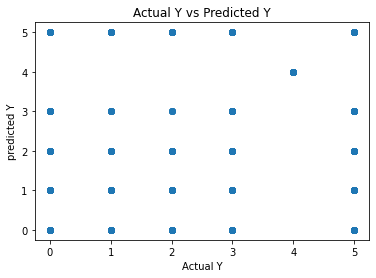

In [32]:
plt.scatter(Y_test,Y_pred)
plt.title('Actual Y vs Predicted Y')
plt.xlabel('Actual Y')
plt.ylabel('predicted Y')
plt.show()

**Confusion matrix for X_test, Y_pred...**

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


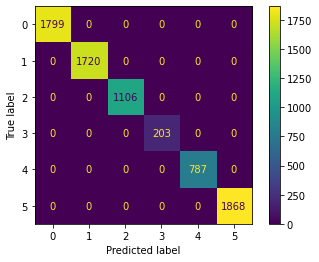

In [34]:
plot_confusion_matrix(classifier,X_test,Y_pred)
plt.show()

**Checking attack type with if condition with row index value of X_test dataset...**

In [35]:
index = int(input())
pred_value = Y_pred[index]
if pred_value == 0:
  print('attack type:'+'TCP-SYN Attack')
elif pred_value == 1:
  print('attack type:'+'Blackhole Attack')
elif pred_value == 2:
  print('attack type:'+'Diversion Attack')
elif pred_value == 3:
  print('attack type:'+'Overflow Attack')
elif pred_value == 5:
  print('attack type:'+'portscan Attack')
else:
  print('attack type:'+'Normal')

53
attack type:portscan Attack


**Conclusion:**

Model training sucessfully complited with accuracy score 92%.